In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib as mpl
    
import sys  
sys.path.insert(0, '../src/')

from astropy.table import Table

from jsm_massfunc import CSMF, SHMR, scatter_stat
from jsm_datareduc import prep_data
import galhalo
import os

>>> Normalizing primordial power spectrum P(k)=(k/k_0)^n_s ...
    such that sigma(R=8Mpc/h) =   0.8000.
>>> Tabulating sigma(M,z=0) ...
    From now on, sigma(M,z) is computed by interpolation.
>>> Tabulating z(W) and z(t_lkbk)...
>>> Preparing output redshifts for merger trees ...
    Number of output redshifts =  354, up to z = 20.06
>>> Tabulating Parkinson+08 J(u_res) ...
>>> Building interpolation grid for Green+19 M(<r|f_b,c)...
>>> Building interpolation grid for Green+19 sigma(r|f_b,c)...
>>> Building interpolation grid for Green+19 d2Phidr2(r|f_b,c)...
>>> Building interpolator for Jiang+15 orbit sampler...


In [3]:
Mh = prep_data(("../../data/12_4_0/numpy/acc_surv_mass.npy"), convert=False, includenan=False)
Ms = prep_data(("../../data/12_4_0/numpy/acc_surv_mass.npy"), includenan=False)

### Investigating the rank ordered subhalo mass distribution

In [4]:
def mass_rank(mass):

    rank = np.flip(np.argsort(mass,axis=1), axis=1) # rank the subhalos from largest to smallest

    ranked_mass = np.take_along_axis(mass, rank, axis=1) # this is it!!!

    return rank, ranked_mass
    

In [5]:
rank, sort = mass_rank(Mh)

In [29]:
Mh.shape

(3129, 168)

In [6]:
ave = np.mean(sort, axis=0) #some standard statistics
std = np.std(sort, axis=0)
Nrank = ave.shape[0]

In [7]:
sort

array([[10.99654577, 10.70776798, 10.42880879, ...,  8.19796313,
         8.19570303,  8.15824983],
       [11.66862056, 10.28443221, 10.24050585, ...,  8.16800752,
         8.16511321,  8.15613345],
       [11.54522199, 10.33460854, 10.10118571, ...,  8.16411228,
         8.16179377,  8.1585605 ],
       ...,
       [11.34732481, 11.24559806, 10.8732721 , ...,  8.19133745,
         8.17385295,  8.17202721],
       [11.53281089, 11.0898839 , 10.94788764, ...,  8.16735177,
         8.16089963,  8.15673456],
       [10.32958948, 10.20586051, 10.14632472, ...,  8.16494429,
         8.16296255,  8.15945156]])

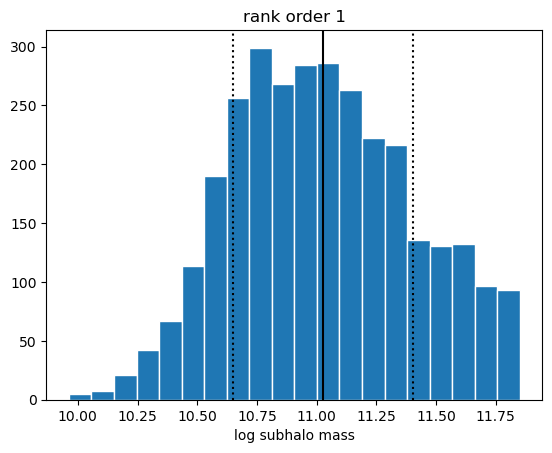

In [8]:
i = 0
plt.title("rank order "+str(i+1))
plt.axvline(ave[i], color="black")
plt.axvline(ave[i]+std[i], ls=":", color="black")
plt.axvline(ave[i]-std[i], ls=":", color="black")
plt.hist(sort[:,i], bins=20, edgecolor="white")
plt.xlabel("log subhalo mass")
plt.show()

### Now working in stellar mass

In [9]:
rank_s, sort_s = mass_rank(Ms)

In [10]:
det_ave = np.mean(sort_s, axis=0) #some standard statistics
det_std = np.std(sort_s, axis=0)

In [11]:
sort_s

array([[8.2637133 , 7.73813773, 7.230432  , ..., 3.1702929 , 3.16617952,
        3.09801469],
       [9.48688941, 6.96766662, 6.88772064, ..., 3.11577369, 3.11050605,
        3.09416288],
       [9.26230403, 7.05898754, 6.63415799, ..., 3.10868435, 3.10446466,
        3.09858011],
       ...,
       [8.90213116, 8.71698847, 8.03935522, ..., 3.15823415, 3.12641236,
        3.12308953],
       [9.23971583, 8.4335887 , 8.1751555 , ..., 3.11458022, 3.10283733,
        3.0952569 ],
       [7.04985285, 6.82466614, 6.716311  , ..., 3.1101986 , 3.10659185,
        3.10020184]])

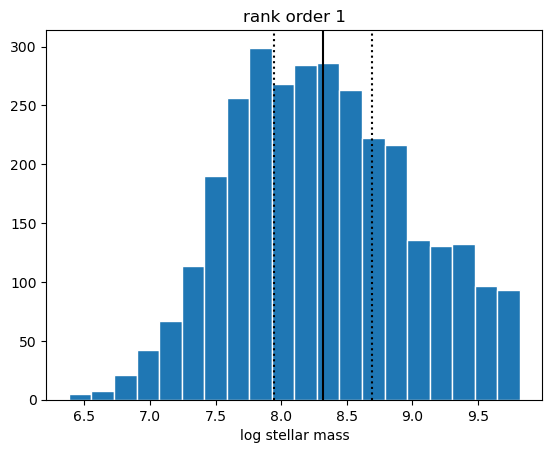

In [12]:
i = 0
plt.title("rank order "+str(i+1))
plt.axvline(det_ave[i], color="black")
plt.axvline(det_ave[i]+std[i], ls=":", color="black")
plt.axvline(det_ave[i]-std[i], ls=":", color="black")
plt.hist(sort_s[:,i], bins=20, edgecolor="white")
plt.xlabel("log stellar mass")
plt.show()

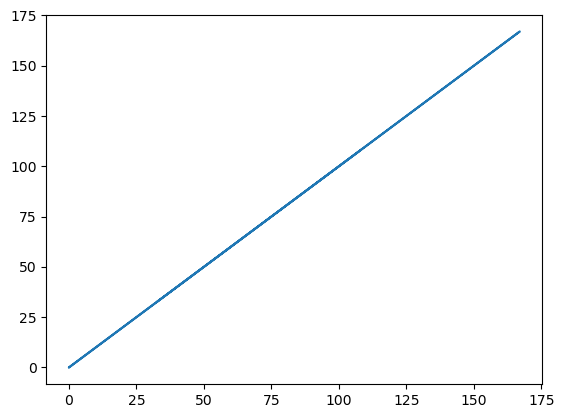

In [13]:
plt.plot(rank[:,1], rank_s[:,1])
plt.show()

### now trying an array of scatter values for several samples

In [14]:
scatter_pix = 15
scatter_range = np.round(np.linspace(0.0,1.5,scatter_pix), 3)
N_samples=500

In [15]:
sort_s.shape

(3129, 168)

In [16]:
# #now to loop over each value of scatter, now to loop for every realization, and every subhalo!

# mat = np.zeros(shape=(scatter_pix,sort_s.shape[0],sort_s.shape[1],N_samples))

# for k, sigma in enumerate(scatter_range):
    
#     print(k)

#     for i, pop in enumerate(sort_s):

#         for j, subhalo in enumerate(pop):

#             mat[k, i, j] = np.random.normal(loc=subhalo, scale=sigma, size=N_samples)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [18]:
#np.save("../../data/4D_mass_rank.npy", mat)

In [19]:
mat.shape

(15, 3129, 168, 500)

In [20]:
across_samp = np.average(mat, axis=3)

In [22]:
across_samp.shape

(15, 3129, 168)

In [65]:
ave_rank = np.mean(across_samp, axis=1) #some standard statistics
std_rank = np.std(across_samp, axis=1)

In [57]:
_, bins = np.histogram(np.nan, bins=50, range=[5.8, 7.8], normed=True)


/var/folders/91/ygwd64w5659_623tzhx80kbc0000gn/T/ipykernel_25354/559500345.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  _, bins = np.histogram(np.nan, bins=50, range=[5.8, 7.8], normed=True)


In [58]:
bins

array([5.8 , 5.84, 5.88, 5.92, 5.96, 6.  , 6.04, 6.08, 6.12, 6.16, 6.2 ,
       6.24, 6.28, 6.32, 6.36, 6.4 , 6.44, 6.48, 6.52, 6.56, 6.6 , 6.64,
       6.68, 6.72, 6.76, 6.8 , 6.84, 6.88, 6.92, 6.96, 7.  , 7.04, 7.08,
       7.12, 7.16, 7.2 , 7.24, 7.28, 7.32, 7.36, 7.4 , 7.44, 7.48, 7.52,
       7.56, 7.6 , 7.64, 7.68, 7.72, 7.76, 7.8 ])

/var/folders/91/ygwd64w5659_623tzhx80kbc0000gn/T/ipykernel_25354/1247409919.py:12: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  _, bins = np.histogram(np.nan, bins=20, range=[ave_ij-3*std_ij, ave_ij+3*std_ij], normed=True)


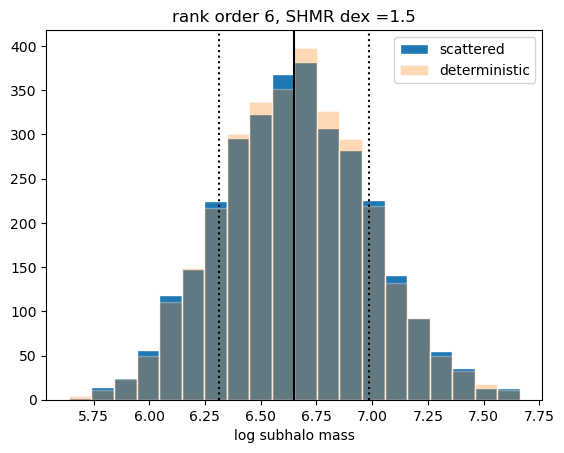

In [80]:
i = 5
j = 14

ave_ij = ave_rank[j, i]
std_ij = std_rank[j, i]

plt.title("rank order "+str(i+1)+", SHMR dex ="+str(scatter_range[j]))
plt.axvline(ave_ij, color="black")
plt.axvline(ave_ij+std_ij, ls=":", color="black")
plt.axvline(ave_ij-std_ij, ls=":", color="black")

_, bins = np.histogram(np.nan, bins=20, range=[ave_ij-3*std_ij, ave_ij+3*std_ij], normed=True)

plt.hist(across_samp[j,:,i], bins=bins, edgecolor="white", label="scattered")
plt.hist(sort_s[:,i], bins=bins, edgecolor="white", alpha=0.3, label="deterministic")
plt.xlabel("log subhalo mass")
plt.legend()
plt.show()

In [93]:
colors = ["maroon", "red", "orange", "green", "navy"]

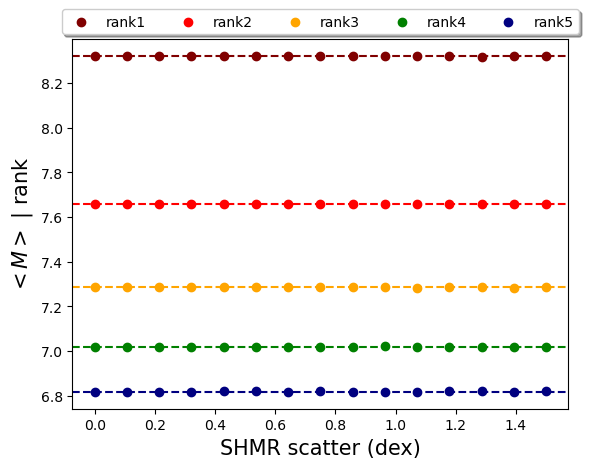

In [128]:
for i in range(5):
    plt.scatter(scatter_range, ave_rank[:,i], color=colors[i], label="rank"+str(i+1))
    plt.axhline(det_ave[i], color=colors[i], ls="--")
plt.xlabel("SHMR scatter (dex)", fontsize=15)
plt.ylabel("$ <M> $ | rank", fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          ncol=5, fancybox=True, shadow=True)
plt.show()

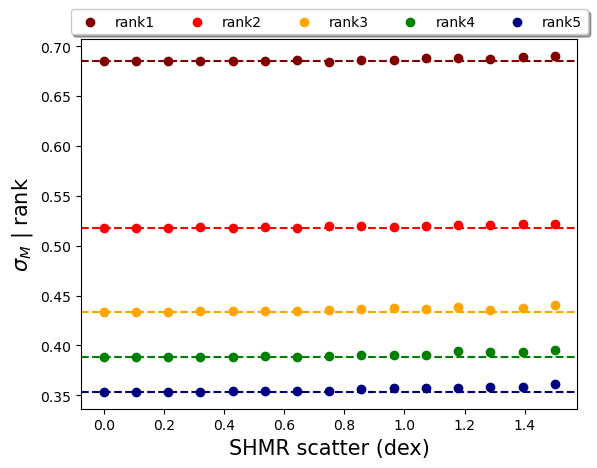

In [129]:
for i in range(5):
    plt.scatter(scatter_range, std_rank[:,i], color=colors[i], label="rank"+str(i+1))
    plt.axhline(det_std[i], color=colors[i], ls="--")
plt.xlabel("SHMR scatter (dex)", fontsize=15)
plt.ylabel("$\sigma_M $ | rank", fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          ncol=5, fancybox=True, shadow=True)
plt.show()

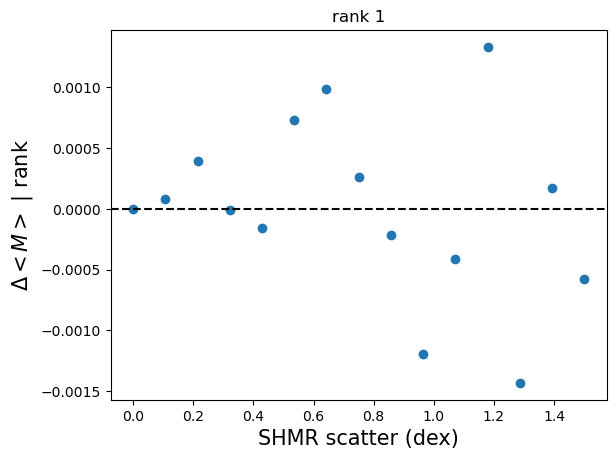

In [122]:
i = 0
plt.title("rank "+str(i+1))
plt.scatter(scatter_range, ave_rank[:,i] - det_ave[i])
plt.axhline(0, color="black", ls="--")


plt.xlabel("SHMR scatter (dex)", fontsize=15)
plt.ylabel("$ \Delta <M> $ | rank", fontsize=15)
plt.show()

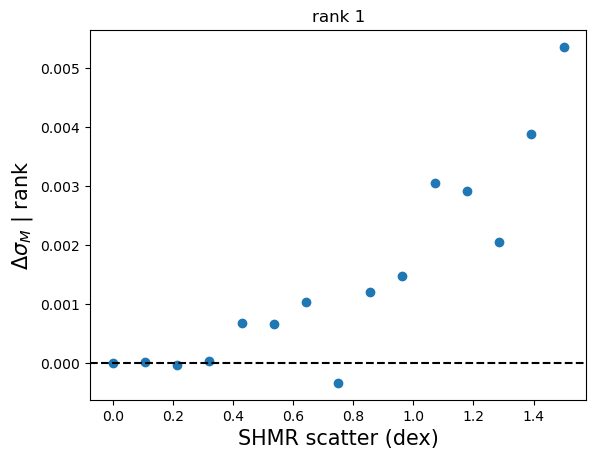

In [121]:
i = 0
plt.title("rank "+str(i+1))
plt.scatter(scatter_range, std_rank[:,i]-det_std[i])
plt.axhline(0, color="black", ls="--")


plt.xlabel("SHMR scatter (dex)", fontsize=15)
plt.ylabel("$ \Delta \sigma_M $ | rank", fontsize=15)
plt.show()